In [27]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics 
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("D:\Project-ML\HTRU2 (1)\HTRU_2.csv")
data.columns = ['M1','S1','EX1','SK1','M2','S2','EX2','SK2','outcomes']    
data.head()     

,M1,S1,EX1,SK1,M2,S2,EX2,SK2,outcomes
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [28]:
data.describe()

,M1,S1,EX1,SK1,M2,S2,EX2,SK2,outcomes
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


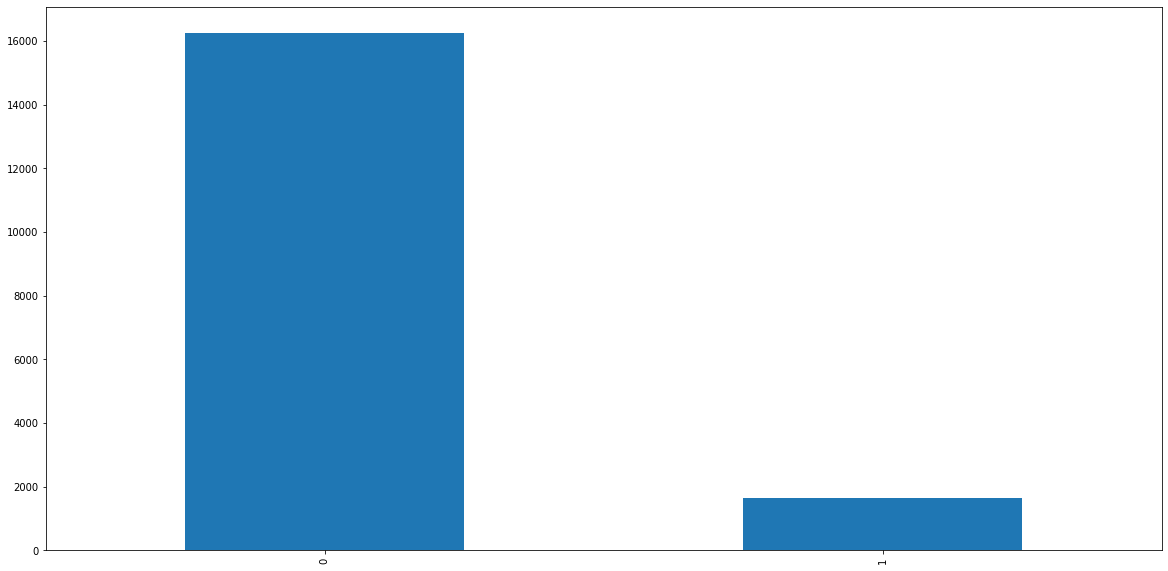

In [45]:
#Plot the bar graph for evaluation(class) instance
data['outcomes'].value_counts().plot(kind='bar',figsize=(20,10))

In [47]:
data['outcomes'].value_counts()

0    16258
1     1639
Name: outcomes, dtype: int64

In [51]:
data.isna().sum()

M1          0
S1          0
EX1         0
SK1         0
M2          0
S2          0
EX2         0
SK2         0
outcomes    0
dtype: int64

In [29]:
#describe X as features and y as class. 
X=data[data.columns[:-1]]
y=data['outcomes']

In [31]:
print(X)

               M1         S1       EX1       SK1          M2         S2  \
0      102.507812  58.882430  0.465318 -0.515088    1.677258  14.860146   
1      103.015625  39.341649  0.323328  1.051164    3.121237  21.744669   
2      136.750000  57.178449 -0.068415 -0.636238    3.642977  20.959280   
3       88.726562  40.672225  0.600866  1.123492    1.178930  11.468720   
4       93.570312  46.698114  0.531905  0.416721    1.636288  14.545074   
...           ...        ...       ...       ...         ...        ...   
17892  136.429688  59.847421 -0.187846 -0.738123    1.296823  12.166062   
17893  122.554688  49.485605  0.127978  0.323061   16.409699  44.626893   
17894  119.335938  59.935939  0.159363 -0.743025   21.430602  58.872000   
17895  114.507812  53.902400  0.201161 -0.024789    1.946488  13.381731   
17896   57.062500  85.797340  1.406391  0.089520  188.306020  64.712562   

             EX2         SK2  
0      10.576487  127.393580  
1       7.735822   63.171909  
2     

In [32]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,-0.334107,1.802379,-0.011822,-0.370549,-0.371110,-0.588931,0.504409,0.211560
1,-0.314311,-1.053271,-0.145268,-0.116613,-0.322117,-0.235343,-0.125997,-0.391379
2,1.000768,1.553363,-0.513438,-0.390191,-0.304414,-0.275681,-0.312261,-0.481304
3,-0.871346,-0.858823,0.115570,-0.104886,-0.388018,-0.763113,1.323985,1.386742
4,-0.682521,0.021788,0.050758,-0.219475,-0.372501,-0.605113,0.514453,0.249118


# Apply hierarchical clustering for all features

In [33]:
#Hierarchical clustering - AgglomerativeClustering 
AgClustr = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
predA_X = AgClustr.fit_predict(X)

frame = pd.DataFrame(X)
frame['cluster'] = predA_X
frame['cluster'].value_counts()

#Contingency metrix
cm_A_X = contingency_matrix(y, predA_X)
print(cm_A_X)

#Classification report for all the features
print("Classification report")
print(classification_report(y, predA_X))

[[16247    11]
 [  827   812]]
Classification report with 8 features
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16258
           1       0.99      0.50      0.66      1639

    accuracy                           0.95     17897
   macro avg       0.97      0.75      0.82     17897
weighted avg       0.95      0.95      0.95     17897



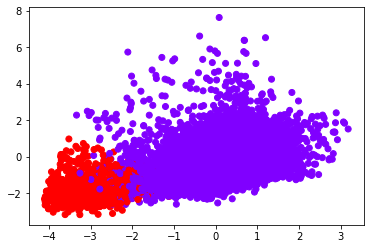

In [34]:
#Scatter plot shown the data point for cluster = 2 
plt.scatter(X[:, 0], X[:, 1], c=predA_X, cmap = 'rainbow')

# SPLITING  FEATURES IN TWO PARTS

In [39]:
#Divide features in two parts, first 4 feature(x_1_4) and last four features(x_5_8)

X = data[data.columns[:-1]]        
X_5_8= data.drop(['M1','S1','EX1','SK1','outcomes'], axis=1)  #remove first 4 columns and class   
X_1_4 = data.drop(['M2','S2','EX2','SK2','outcomes'], axis=1) #remove last 4 columns and class   
y = data['outcomes']
print(X_1_4.head())
print(X_5_8.head())

           M1         S1       EX1       SK1
0  102.507812  58.882430  0.465318 -0.515088
1  103.015625  39.341649  0.323328  1.051164
2  136.750000  57.178449 -0.068415 -0.636238
3   88.726562  40.672225  0.600866  1.123492
4   93.570312  46.698114  0.531905  0.416721
         M2         S2        EX2         SK2
0  1.677258  14.860146  10.576487  127.393580
1  3.121237  21.744669   7.735822   63.171909
2  3.642977  20.959280   6.896499   53.593661
3  1.178930  11.468720  14.269573  252.567306
4  1.636288  14.545074  10.621748  131.394004


# FIRST FOUR FEATURES

In [53]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X_1_4 = StandardScaler().fit_transform(X_1_4)

#Hierarchical clustering - AgglomerativeClustering ----
AgClustr = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
predA_X_1_4 = AgClustr.fit_predict(X_1_4)

frame = pd.DataFrame(X_1_4)
frame['cluster'] = predA_X_1_4
frame['cluster'].value_counts()

#Contingency metrix
cm_A_X_1_4 = contingency_matrix(y, predA_X_1_4)
print(cm_A_X_1_4)

#Classification report for first four features
print("Classification report")
print(classification_report(y, predA_2_X_1_4))

[[16234    24]
 [  556  1083]]
Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16258
           1       0.98      0.66      0.79      1639

    accuracy                           0.97     17897
   macro avg       0.97      0.83      0.89     17897
weighted avg       0.97      0.97      0.96     17897



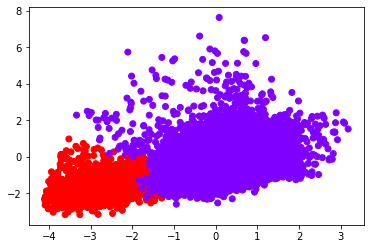

In [54]:
#Scatter plot shown the data point for cluster = 2 
plt.scatter(X_1_4[:, 0], X_1_4[:, 1], c=predA_X_1_4, cmap = 'rainbow')

# LAST FOUR FEATURES

In [55]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X_5_8 = StandardScaler().fit_transform(X_5_8)

# Hierarchical clustering - AgglomerativeClustering 
AgClustr = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
predA_X_5_8 = AgClustr.fit_predict(X_5_8)

frame = pd.DataFrame(X_5_8)
frame['cluster'] = predA_X_5_8
frame['cluster'].value_counts()

#Contingency metrix
cm_A_X_5_8 = contingency_matrix(y, predA_X_5_8)
print(cm_A_X_5_8)

#Classification report for last Four features.
print("classification report")
print(classification_report(y, predA_X_5_8))

[[15190  1068]
 [  676   963]]
classification report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     16258
           1       0.47      0.59      0.52      1639

    accuracy                           0.90     17897
   macro avg       0.72      0.76      0.74     17897
weighted avg       0.91      0.90      0.91     17897



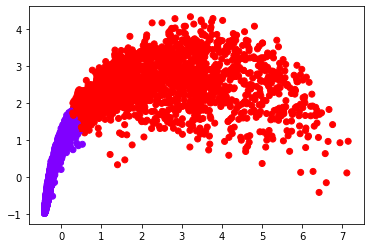

In [56]:
#Scatter plot shown the data point for cluster = 2 
plt.scatter(X_5_8[:, 0], X_5_8[:, 1], c=predA_X_5_8, cmap = 'rainbow')
